  # $\color{red}{\text{TELECOM CUSTOMER CHURN PREDICTION 📈}}$
    
    


###  Did you know that attracting a new customer costs five times as much as keeping an existing one?

   
   
  
  
  
  
  
  
  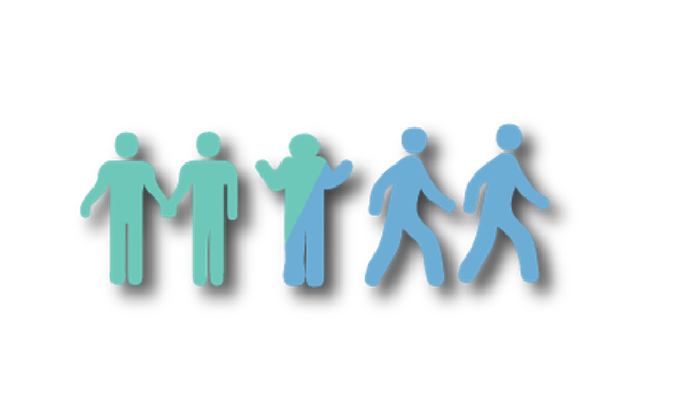
   
          
          
          
          
          
          
          
          
          
          
          
          











   ## $\color{red}{\text{TABLE OF CONTENT}}$


    1.0 Introduction
 
    1.1 Data column Information
    
    1.2 Loading the libraries

    1.3 Understanding the Data Set (Descriptive Statistics)

    1.4 Visualizing Missing Values

    1.5 Data Manipulation




    2.0 Exploratory Data Analysis

    2.1 Univariate Exploration

    2.2 Multivariate Exploaration




    3.0 Correlation Matrix



    4.0 Data Processing

    4.1 Encoding (Label Encoding)

    4.2 Checking for Multicolinearity

    4.3 Balancing (Oversampling)

    4.4 Scaling (Standard Scaler)




    5.0 Modelling and accuracy

    5.1 logistic Regression

    5.1.1 Model without removing Multicollinearity

    5.1.2 Model after removing Multicollinearity

    5.2 Decision Trees

    5.3 KNN

    5.3 Random Forest



    6.0 Hyperparameter Tuning for the best model
    
    
    7.0 Model Evaluation
    
    8.0 Customer Retention Program
    
    9.0 Conclusion


### $\color{red}{\text{INTRODUCTION}}$


### $\color{red}{\text{What is Customer Churn?}}$

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

* Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

* Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

* Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


* To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


* To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

* As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


### $\color{red}{\text{Business Problem}}$

* Predicting behavior to retain customers by analyzing all relevant customer data i.e create a model that is able to predict customers that will churn








## $\color{red}{\text{DATA COLUMN INFORMATION}}$



* CustomerID: A unique ID that identifies each customer. NO

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Country: The country of the customer’s primary residence.

* State: The state of the customer’s primary residence.

* City: The city of the customer’s primary residence.

* Zip Code: The zip code of the customer’s primary residence.

* Lat Long: The combined latitude and longitude of the customer’s primary residence.

* Latitude: The latitude of the customer’s primary residence.

* Longitude: The longitude of the customer’s primary residence.  NO LOCATION DATA

* Gender: The customer’s gender: Male, Female

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Partner: Indicate if the customer has a partner: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

* Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

* Churn Score: A value from 0-100 that is calculated. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [353]:
# Loading the libraries and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Libraries for Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

##Libraries for Model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#hper parameter modelin
from sklearn.model_selection import GridSearchCV

# to remove warnings
import warnings
warnings.filterwarnings('ignore') 

In [354]:
#loading data


df = pd.read_excel('Telco_customer_churn.xlsx')

## $\color{red}{\text{UNDERSTANDING THE DATA ( Descriptive Statistics)}}$

Each row represents a customer, each column contains customer’s attributes described on the column data.

In [355]:
# to have a glimpse of what the data looks like.

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices





The data set includes information about:

* Customers who left within the last month – the column is called Churn Label.

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

* Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

* Demographic info about customers – gender, age range, and if they have partners and dependents.



In [356]:
# to get information on data coulmns, no of values and it variuos datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [357]:
# the shape of the data in row and column format

df.shape

(7043, 33)

In [358]:
# viewing the columns in the dataset

df.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

In [359]:
# converting Total charge to Numeric dtype

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [360]:
# rechecking the columns dataset to confirm 'Total Charges' is now a float

df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

 * The target the we will use to guide the exploration is Churn Label and also note that  'Churn Value' is just like a normalized 'Churn label'

## $\color{red}{\text{VISUALIZING MISSING VALUES}}$

<AxesSubplot:>

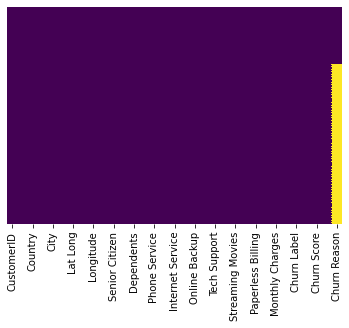

In [361]:
# to view column with empty value at a quick glance

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Using this heatmap, we can very quickly find the pattern of missingness in the dataset.

 * From the above visualisation we can observe that "Churn Reason" has high number of missing values

In [362]:


# Reconfirming the missing value from the dataset
print (df.isnull().sum())

print('\n')

# Having the null value in Percentage for easy representation

print (df.isnull().mean() * 100)

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


CustomerID            0.000000
Count                 0.000000
Country               0.000000
State                 0.000000
Cit

In [363]:
# to view all rows in the dataset with null values in the 'Total Charge Column'

df[np.isnan(df['Total Charges'])]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


 * It can also be noted that the Monthly Charges column is not empty for these entries, even though Total charges is NaN.
 
Now Let's see if there are any 0 values in the tenure column.

In [364]:
# Now Let's see if there are any 0 values in the tenure column.

df[np.isnan(df['Total Charges'])]['Tenure Months']

2234    0
2438    0
2568    0
2667    0
2856    0
4331    0
4687    0
5104    0
5719    0
6772    0
6840    0
Name: Tenure Months, dtype: int64

In [365]:
# Now Let's see if there are any ther 0 values in the tenure column.

df[df['Tenure Months'] == 0].index

Int64Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')

 * There are no additional missing values in the Tenure column.


In [366]:
# Now lets describe our dataset while transposing

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Total Charges,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


 At a quick glance, we can infer that;
    
    * The total number of customers whose information are under study are 7043
    * Only 26.5% of the customer churned 
    * Monthly Charges to customers is max of 118.75 and there can be few or no outliers
    at the higher end of the plot as well.

## $\color{red}{\text{DATA MANIPULATION}}$

In [367]:
# dropping the irrelevant values

df.drop(['Count', 'Zip Code', 'Latitude', 'Longitude','CustomerID', 'Country','State', 'City','Lat Long',], axis=1, inplace=True)


In [368]:
# Now lets describe our dataset while transposing after dropping some irrelevancy in our data set

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure Months,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
Monthly Charges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
Total Charges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Churn Value,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00
Churn Score,7043.0,58.699418,21.525131,5.00,40.00,61.000,75.0000,100.00
CLTV,7043.0,4400.295755,1183.057152,2003.00,3469.00,4527.000,5380.5000,6500.00


In [369]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [370]:
# removing the irrelevant columns and cloumn with high missing values

df.drop(['Churn Reason'], axis=1, inplace=True)

 * Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [371]:
# delete the rows with missing values in Tenure columns since there are only 11 rows 
# and deleting them will not affect the data.

df.drop(labels=df[df['Tenure Months'] == 0].index, axis=0, inplace=True)
df[df['Tenure Months'] == 0].index

Int64Index([], dtype='int64')

* To solve the problem of missing values in TotalCharges column,
I decided to fill it with the mean of Total Charges values.

In [372]:
# To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of Total Charges values.

df.fillna(df["Total Charges"].mean())

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793


In [373]:
# Now we have a clean data with non- null values

df.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [374]:
# Describing data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure Months,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
Monthly Charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
Total Charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn Value,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00
Churn Score,7032.0,58.715301,21.531321,5.00,40.0000,61.000,75.0000,100.00
CLTV,7032.0,4401.445108,1182.414266,2003.00,3469.7500,4527.500,5381.0000,6500.00


## $\color{red}{\text{EXPLORATORY DATA ANALYSIS}}$

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. We will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

*  Demographics - Let's understand the gender, age range, patner and dependent status of the customers

* Customer Account Information: Let's look at the tenure, contract

* distribution of various services used by customers

* Now let's take a quick look at the relation between monthly and total charges

* Finally, let's take a look at out predictor variable (Churn Value) and understand its interaction with other important variables.



### $\color{red}{\text{SPLITTING INTO TRAIN AND TEST DATA }}$

In [375]:
# preventing data leakage, so we will split our train and test here and use our train test for our exploratory Data Analysis.


train,test = train_test_split(df,test_size=0.2,random_state=1)

In [376]:
train.head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
3456,Female,No,Yes,No,57,Yes,Yes,DSL,Yes,No,...,Yes,Two year,Yes,Electronic check,84.50,4845.40,No,0,41,5928
611,Male,No,No,No,2,Yes,No,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,47.80,92.45,Yes,1,89,4134
588,Male,No,No,No,10,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.00,740.00,Yes,1,67,3156
2684,Female,No,Yes,No,9,Yes,No,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,79.75,769.10,No,0,62,4654
1544,Male,Yes,Yes,No,21,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,69.10,1474.75,Yes,1,67,3853
2888,Male,No,No,No,64,Yes,Yes,DSL,No,Yes,...,Yes,Two year,No,Credit card (automatic),86.55,5632.55,No,0,57,4934
1072,Male,Yes,Yes,No,58,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,98.70,5812.60,Yes,1,91,4662
6937,Male,No,No,No,62,Yes,No,DSL,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),80.40,4981.15,No,0,79,5157
6426,Female,No,No,Yes,13,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),104.15,1299.10,No,0,33,2810
997,Male,No,Yes,No,54,Yes,No,Fiber optic,Yes,Yes,...,Yes,Two year,No,Bank transfer (automatic),109.75,6110.20,Yes,1,90,6274


In [377]:
#train shape

train.shape

(5625, 23)

In [378]:
#test Shape

test.shape

(1407, 23)

### $\color{red}{\text{UNIVARIATE EXPLORATION}}$

In [379]:
# let's check the proportion of customers that has churned,

#Target variable

train['Churn Value'].describe()

count    5625.000000
mean        0.270044
std         0.444022
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn Value, dtype: float64

* Distribution of Churn Label 

Most of the customers have not churned, only 27% out of total customers have  churned.

Text(0.5, 0, 'Churn Status')

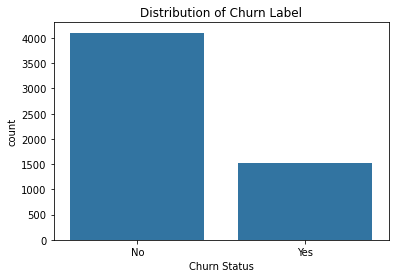

In [380]:
# let's plot the countplot for Churn Label category

base_color = sns.color_palette()[0]
sns.countplot(data = train, x = 'Churn Label', color = base_color);
plt.title("Distribution of Churn Label")
plt.xlabel('Churn Status')

In [381]:
# let's check the distribution of 'Monthly Charges' charged to customers

train['Monthly Charges'].describe()

count    5625.000000
mean       64.737289
std        30.096139
min        18.250000
25%        35.400000
50%        70.450000
75%        89.800000
max       118.750000
Name: Monthly Charges, dtype: float64

* the Average Monthly charge to customers is around 64.73 with a max of 118.75

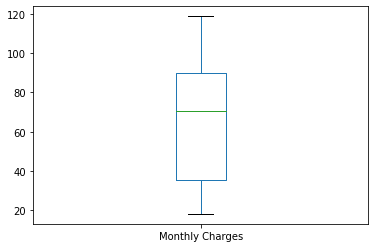

In [382]:
# let's also use plot box plot for monthly charges

train['Monthly Charges'].plot(kind='box');

* Basically, this boxplot shows no outliers in the distribution of the data

<AxesSubplot:xlabel='Monthly Charges'>

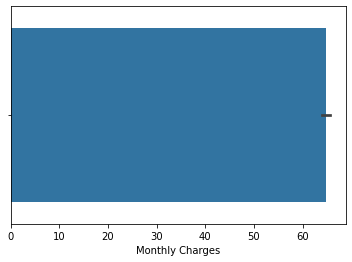

In [383]:
# creating a barplot for Monthly charges to better understand  the feature in relation to customers
sns.barplot(x='Monthly Charges', data=train)

 * Median Monthly charges is around is around 70.35 

 * High Monthly Charges are charged to few customers max of 118.75

 * There're no outliers at the higher end of the plot as well.



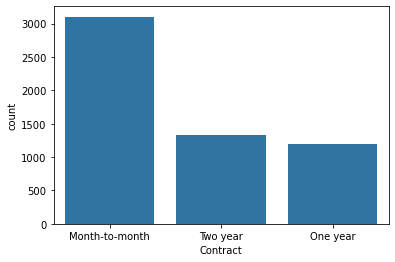

In [384]:
# Contract plot illustration for the various categories

contract_list = ['Month-to-month', 'Two year', 'One year']
sns.countplot(data = train, x = 'Contract', color = base_color, order=contract_list);

* As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

In [385]:
# viewing unique values in the "payment Method " column to aid analysis.

df['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

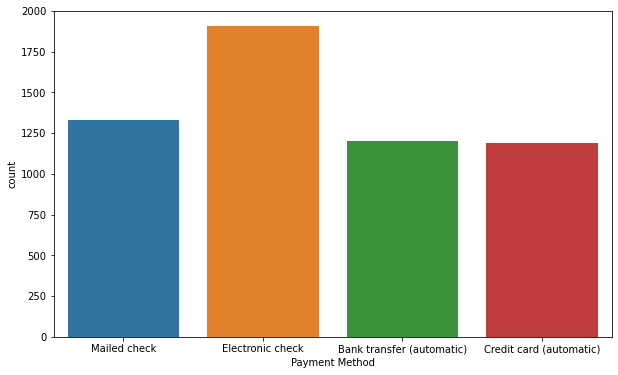

In [386]:
 # Payment Method plot illustration for various categories
    
plt.figure(figsize=(10,6))
payment_meth = ['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)']
sns.countplot(data = train, x = 'Payment Method', order=payment_meth);

* According to the above plot, Electronic Check seems to be the mostly used platform used by customers for payment processing.

<AxesSubplot:xlabel='Partner', ylabel='count'>

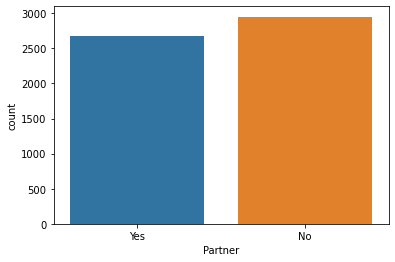

In [387]:
# countplot describing customers in relation to partners.

sns.countplot(data = train, x = 'Partner')

* There's an even distribution and less differences in the no of customers that has a partner and those that don't

<AxesSubplot:xlabel='Dependents', ylabel='count'>

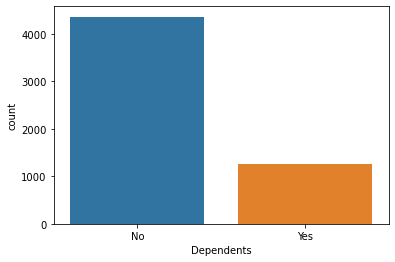

In [388]:
# countplot describing customers in relation to Dependents.

sns.countplot(data = train, x = 'Dependents')

From the analysis above,About 50% of the customers have a partner, while only 30% of the total customers have dependents.

<AxesSubplot:xlabel='Gender', ylabel='count'>

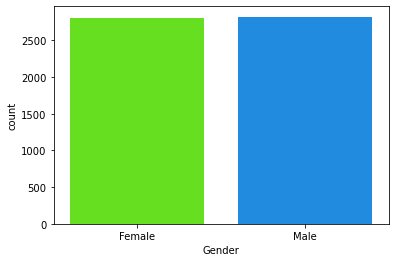

In [389]:
# relating Gender in relation to customers

sns.countplot(x="Gender", data= train, palette="gist_rainbow")

* Gender Distribution - About half of the customers in our data set are male while the other half are female

* Customers transactions based on gender are in a close balanced fashion.

Text(0.5, 1.0, '% of Senior Citizens')

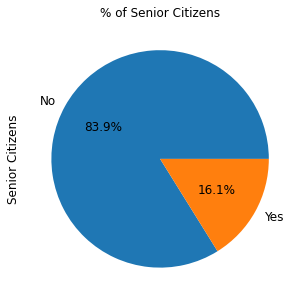

In [390]:
# Descriptive analysis of Senior Citizen in relation to the dataset

ax = (train['Senior Citizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

% Senior Citizens - There are only 16% of the customers who are senior citizens. 
Thus, most of our customers in the data are younger people.

Text(0.5, 1.0, '# of Customers by their tenure')

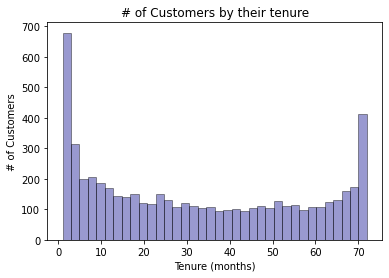

In [391]:
# plotting Histogram to show the relationship between tenure and the customers per se.

ax = sns.distplot(train['Tenure Months'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

 * After looking at the above histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. 

* This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

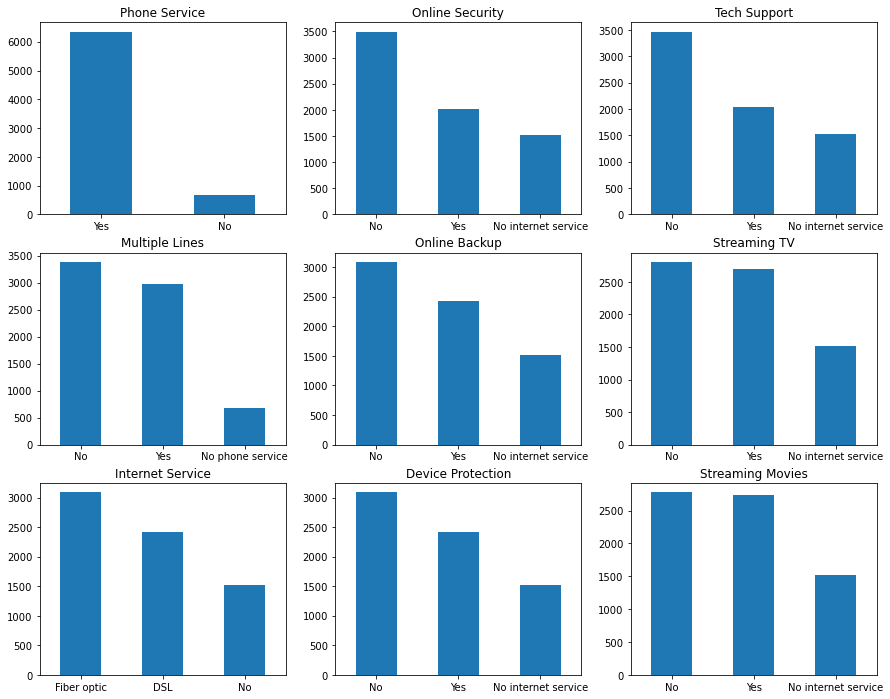

In [392]:
# Grouping Services rendered to customers to be displayed using Subplots

services = ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

* The above diagram depict the distribution of various services used by customers

 #### Now let's take a quick look at the relation between Monthly and Total charges

<AxesSubplot:xlabel='Monthly Charges', ylabel='Total Charges'>

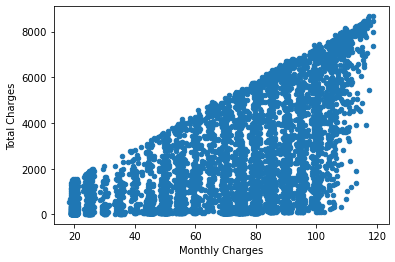

In [393]:
# Exploring the relation between Monthly and Total charges

train[['Monthly Charges', 'Total Charges']].plot.scatter(x = 'Monthly Charges',y='Total Charges')

 * We will observe that the total charges increases as the monthly bill for a customer increases.

### $\color{red}{\text{MULTIVARIATE EXPLORATION}}$





#### let's take a look at out predictor variable (Churn value) and understand its interaction with other important variables as was found out in the correlation plot.

<AxesSubplot:xlabel='Gender', ylabel='count'>

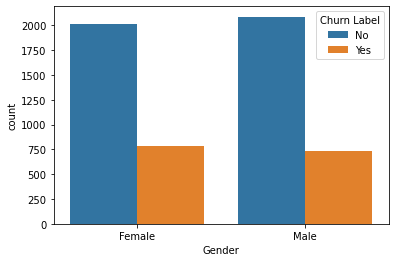

In [394]:
# relating Churn label and Gender to get insight

sns.countplot(x='Gender', hue='Churn Label', data= train)


 * In our data, over 70% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. 

* We will see in the modelling section on how to avoid skewness in the data.

#### Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.


<AxesSubplot:xlabel='Churn Label', ylabel='Tenure Months'>

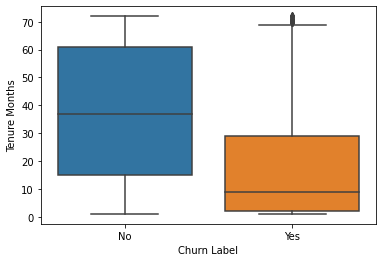

In [395]:
# relating Churn label and Tenure month to get insight

sns.boxplot(x = 'Churn Label', y = 'Tenure Months', data=train)

* Churn vs Tenure: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

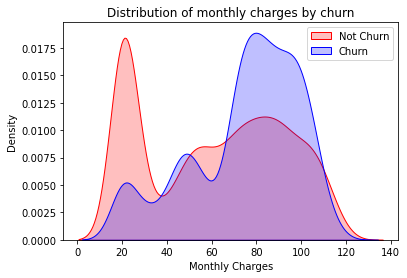

In [396]:
#Distribution of Monthly Charges by Churn


ax = sns.kdeplot(train['Monthly Charges'][(train["Churn Label"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(train['Monthly Charges'][(train["Churn Label"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

* Churn by Monthly Charges: Higher % of customers churn when the monthly charges are high.

Text(0.5, 1.0, 'Distribution of Total charges by churn')

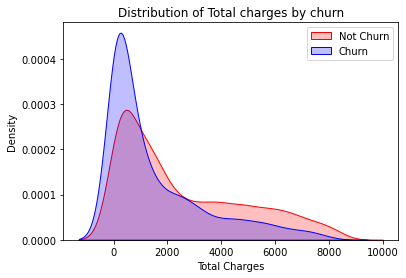

In [397]:
#Distribution of Total Charges by Churn

ax = sns.kdeplot(train['Total Charges'][(train["Churn Label"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(train['Total Charges'][(train["Churn Label"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn')

* Churn by Total Charges: It seems that there is higer churn when the total charges are lower.


Text(0, 0.5, 'Paperless Billing')

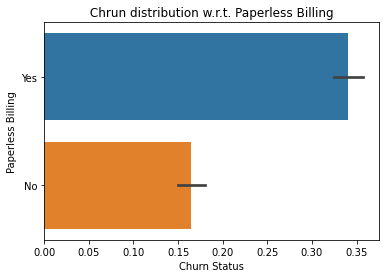

In [398]:
# Churn distribution with respect to Paper Billing

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value',y="Paperless Billing")
plt.title(" Chrun distribution w.r.t. Paperless Billing ")
plt.xlabel('Churn Status')
plt.ylabel('Paperless Billing')

* Customers with Paperless Billing are most likely to churn.

Text(0, 0.5, 'Dependents')

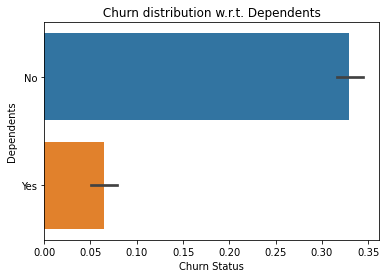

In [399]:
# Churn distribution with respect to dependents

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Dependents")
plt.title(" Churn distribution w.r.t. Dependents ")
plt.xlabel('Churn Status')
plt.ylabel('Dependents')

* Customers without dependents are more likely to churn

Text(0, 0.5, 'Partner')

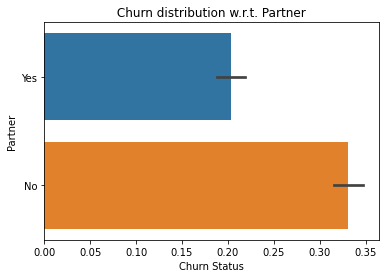

In [400]:
# Churn distribution with respect to Partners

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Partner")
plt.title(" Churn distribution w.r.t. Partner ")
plt.xlabel('Churn Status')
plt.ylabel('Partner')

* Customers that doesn't have partners are more likely to churn

Text(0, 0.5, 'Payment Methods')

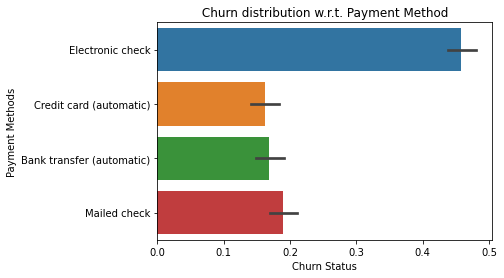

In [401]:
# Churn distribution with respect to Payment Method

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Payment Method")
plt.title(" Churn distribution w.r.t. Payment Method ")
plt.xlabel('Churn Status')
plt.ylabel("Payment Methods")

 * Major customers who moved out were having Electronic Check as Payment Method.
 * Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

Text(0, 0.5, 'InternetService')

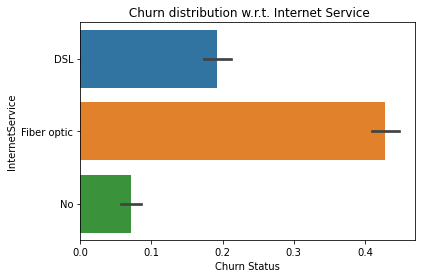

In [402]:
# Churn distribution with respect to internet service

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Internet Service")
plt.title(" Churn distribution w.r.t. Internet Service")
plt.xlabel('Churn Status')
plt.ylabel("InternetService")

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are much in number and have less churn rate compared to Fibre optic service.

Text(0, 0.5, 'Online Backup')

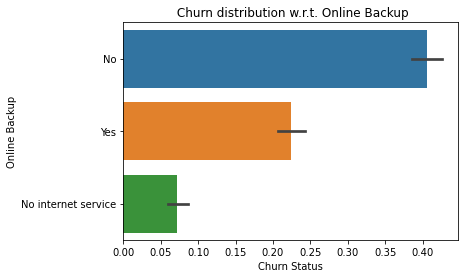

In [403]:
# Churn distribution with respect to online Backup

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Online Backup")
plt.title(" Churn distribution w.r.t. Online Backup")
plt.xlabel('Churn Status')
plt.ylabel("Online Backup")

* Customers without online Backup are more likely to churn

Text(0, 0.5, 'Online Security')

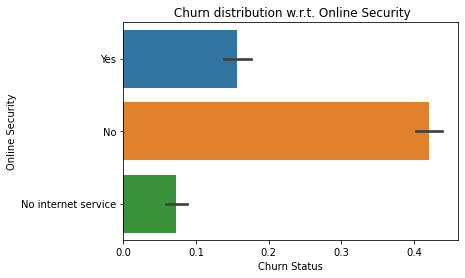

In [404]:
# Churn distribution with respect to online security

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Online Security")
plt.title(" Churn distribution w.r.t. Online Security")
plt.xlabel('Churn Status')
plt.ylabel("Online Security")

Text(0, 0.5, 'Churn Score')

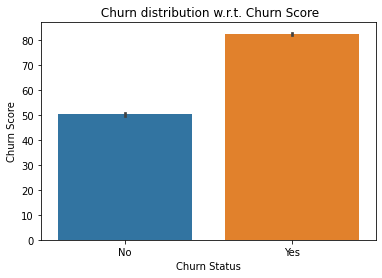

In [405]:
# Churn distribution with respect to Churn Score

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Label', y ="Churn Score")
plt.title(" Churn distribution w.r.t. Churn Score")
plt.xlabel('Churn Status')
plt.ylabel("Churn Score")

* Customers will high churn Score are more likely to churn

Text(0, 0.5, 'Senior Citizen')

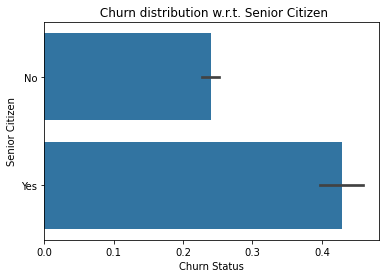

In [406]:
# Churn distribution with respect to senior citizen

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Senior Citizen", color = base_color)
plt.title(" Churn distribution w.r.t. Senior Citizen")
plt.xlabel('Churn Status')
plt.ylabel("Senior Citizen")

 * It can be observed that the fraction of senior citizen is very less.
 * Most of the senior citizens churn.

Text(0, 0.5, 'Multiple Lines')

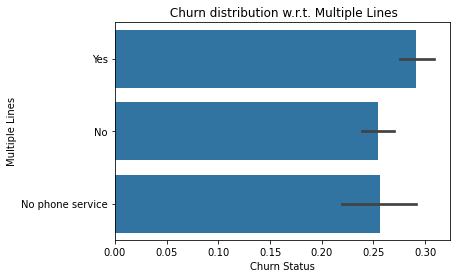

In [407]:
# Churn distribution with respect to Multiple Lines

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Multiple Lines", color = base_color)
plt.title(" Churn distribution w.r.t. Multiple Lines")
plt.xlabel('Churn Status')
plt.ylabel("Multiple Lines")

Text(0, 0.5, 'Tech Support')

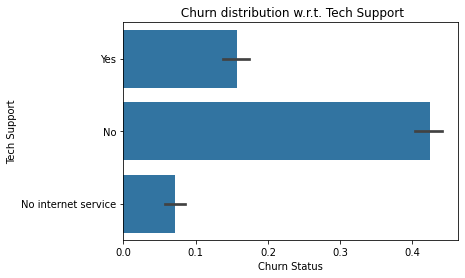

In [408]:
# Churn distribution with respect to tech support

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Tech Support", color = base_color)
plt.title(" Churn distribution w.r.t. Tech Support")
plt.xlabel('Churn Status')
plt.ylabel("Tech Support")

* Customers with no TechSupport are most likely to migrate to another service provider.

Text(0, 0.5, 'Phone Service')

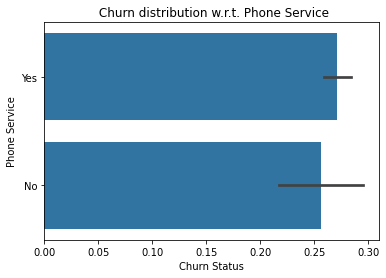

In [409]:
# Churn distribution with respect to phone service

base_color = sns.color_palette()[0]
sns.barplot(data = train, x = 'Churn Value', y ="Phone Service", color = base_color)
plt.title(" Churn distribution w.r.t. Phone Service")
plt.xlabel('Churn Status')
plt.ylabel("Phone Service")

* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

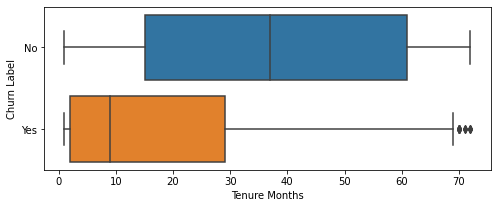

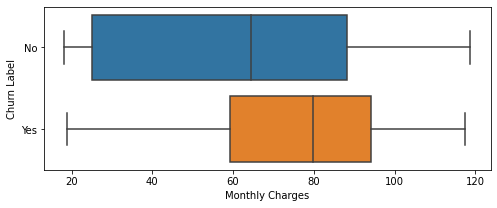

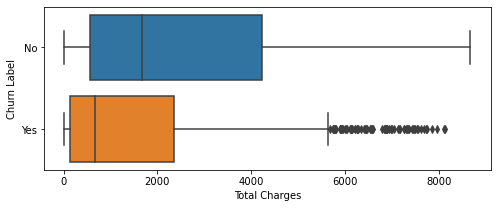

In [410]:
# checking for outliers in our numerical columns

for col in ['Tenure Months', 'Monthly Charges', 'Total Charges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(data = train, x= col, y = 'Churn Label')

* Alot of Outliers in the relationship between churn label and Total Charges which could impact on the accuracy of our model

In [411]:
# Creating a custom function that would read through the num_cols and create a distplot to determine its distribution

def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

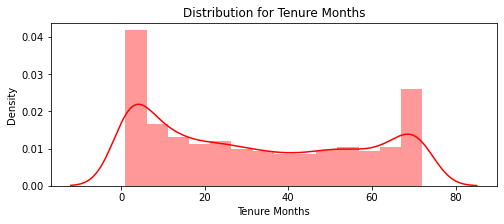

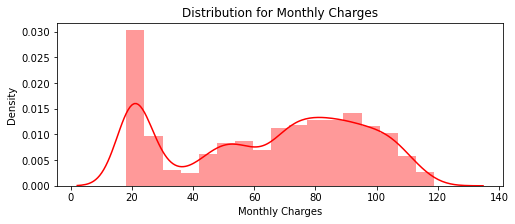

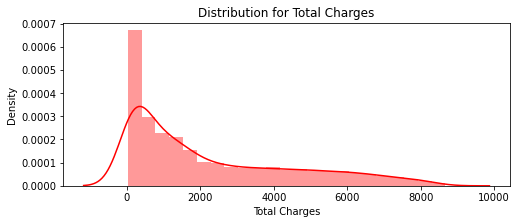

In [412]:
num_cols = ["Tenure Months", 'Monthly Charges', 'Total Charges']

for feat in num_cols: 
    distplot(feat, train)

* Since the numerical features are distributed over different value ranges, I will definitely use standard scalar to scale all my independent variables in the distribution and not just the numerical varialbles

## $\color{red}{\text{CORRELATION MATRIX}}$

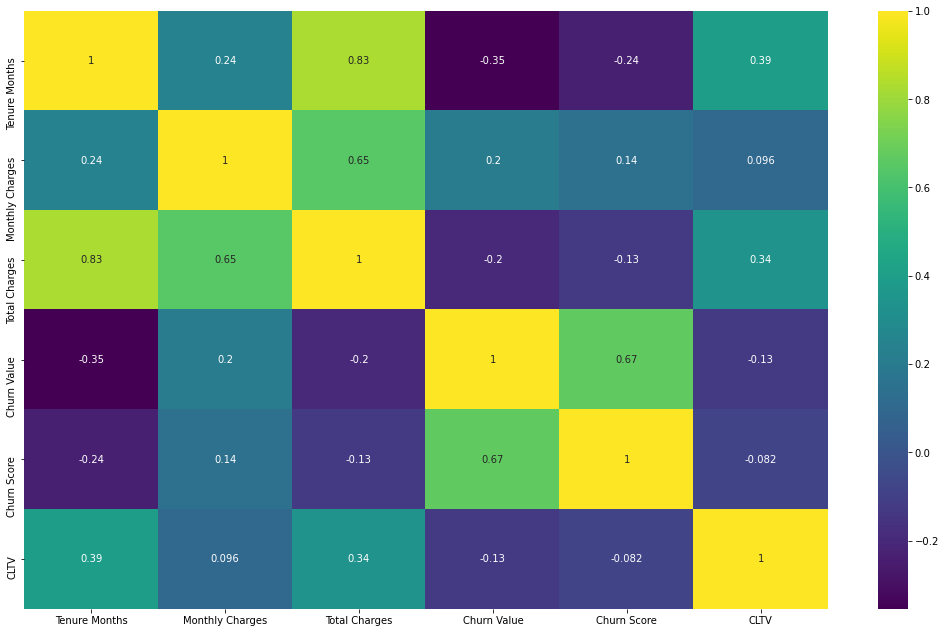

In [413]:
# heatmap showing correlation between the features

plt.figure(figsize=(18,11))

sns.heatmap(train.corr(),annot=True,cmap='viridis');

* Total charges is highly correlated with Tenure Month which is around 0.83%. To avoid the problem of multicollinearity,we will have to remove the "Total charges" because it has less relationship with our dependent variable.

## $\color{red}{\text{DATA PROCESSING}}$


### $\color{red}{\text{ENCODING}}$

In [414]:
# encoding process

cols = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service',
       'Online Backup', 'Tech Support', 'Streaming Movies',
       'Paperless Billing', 'Payment Method','Contract',
        'Online Security', 'Streaming TV' , 'Device Protection']

trainenc = pd.get_dummies(train, columns=cols, drop_first=True)
testenc = pd.get_dummies(test, columns=cols, drop_first=True)

In [415]:
trainenc.shape

(5625, 34)

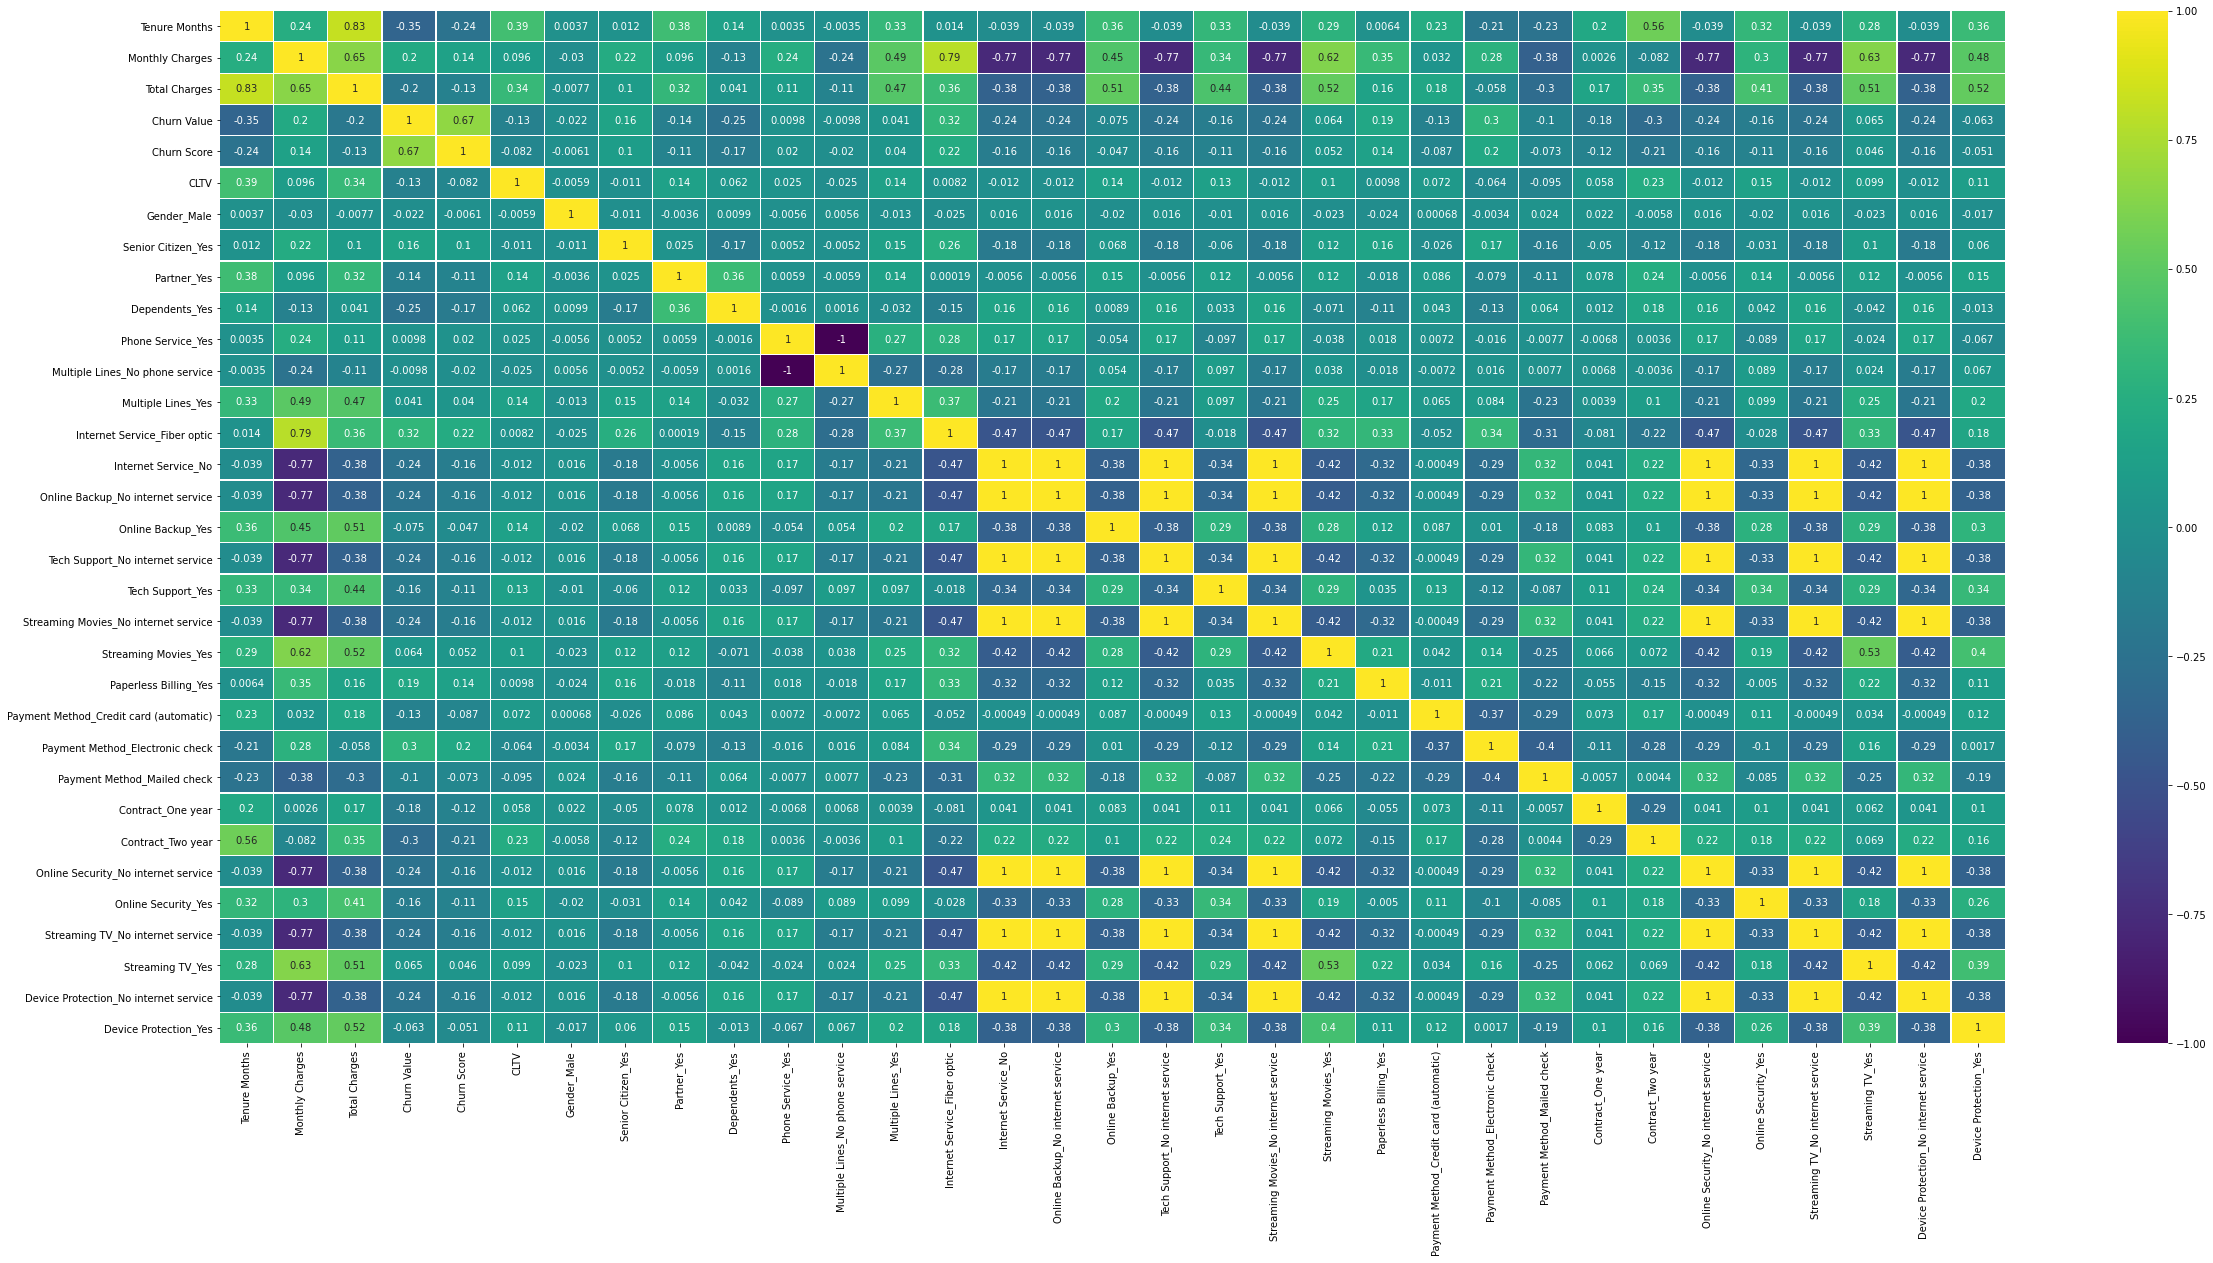

In [416]:
# correlation heatmap after converting the categorical variables using label encoding to binary numbers

cor = trainenc.corr()
fig = plt.figure(figsize=(40,19))
ax = sns.heatmap(cor, xticklabels=cor.columns,
                 yticklabels=cor.columns, annot=True, linewidths=.2, cmap='viridis', vmin=-1, vmax=1)

In [440]:
# dropping other irrelvant feature for our model

train_1 = trainenc.drop(['Churn Label'], axis = 1)
test_1 = testenc.drop(['Churn Label'], axis = 1)

### $\color{red}{\text{MODELLING  WITHOUT REMOVING THE MULTICOLINEARITY PARAMETERS}}$

In [441]:
#dropping the dependent variable from our x-train and x-test data

X_train2 = train_1.drop(['Churn Value'], axis = 1)
y_train2 = train_1["Churn Value"]


X_test2 = test_1.drop(['Churn Value'], axis = 1)
y_test2 = test_1["Churn Value"]


In [442]:
# Balancing the imbalance in our dataset using Oversampling

X_train_resample, y_train_resample = SMOTE().fit_resample(X_train2, y_train2)
X_test_resample, y_test_resample = SMOTE().fit_resample(X_test2, y_test2)

In [443]:
# to confirm the balancing process

print(f'The previous shape of the independent variables is {X_train2.shape}')
print(f'The previous shape of the dependent variable is {y_train2.shape}')
print('\n')
print(f'The current shape of the independent variables is {X_train_resample.shape}')
print(f'The current shape of the dependent variable is {y_train_resample.shape}')
print('\n')
print(f'The previous shape of the independent variables is {X_test2.shape}')
print(f'The previous shape of the dependent variable is {y_test2.shape}')
print('\n')
print(f'The current shape of the independent variables is {X_test_resample.shape}')
print(f'The current shape of the dependent variable is {y_test_resample.shape}')

The previous shape of the independent variables is (5625, 32)
The previous shape of the dependent variable is (5625,)


The current shape of the independent variables is (8212, 32)
The current shape of the dependent variable is (8212,)


The previous shape of the independent variables is (1407, 32)
The previous shape of the dependent variable is (1407,)


The current shape of the independent variables is (2114, 32)
The current shape of the dependent variable is (2114,)


In [444]:
# Standard Scaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train_resample)
test_x_scaled = scaler.transform(X_test_resample)

### $\color{red}{\text{LOGISTIC REGRESSION MODEL}}$

In [445]:
# creating an object for the algorithm

model = LogisticRegression(random_state = 1)

In [446]:
#training the model

model.fit(x_scaled, y_train_resample)

LogisticRegression(random_state=1)

In [447]:
#predicting using the created model.

pred = model.predict(test_x_scaled)

In [448]:
print(accuracy_score(y_test_resample, pred))
print(classification_report(y_test_resample, pred))
print(confusion_matrix(y_test_resample, pred))

0.9427625354777672
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1057
           1       0.93      0.95      0.94      1057

    accuracy                           0.94      2114
   macro avg       0.94      0.94      0.94      2114
weighted avg       0.94      0.94      0.94      2114

[[ 984   73]
 [  48 1009]]


In [449]:
# viewing the F1_score for the model

f1_score(y_test_resample, pred)

0.9434315100514258

### $\color{red}{\text{MODELLING BY REMOVING THE MULTICOLINEARITY PARAMETERS}}$

In [450]:
#dropping the columns with the multicolinearity relationship from the train and test data

X_train2 =  train_1.drop(['Churn Value','Total Charges',
                          'Phone Service_Yes', 'Online Backup_No internet service',
                          'Tech Support_No internet service',
                            'Streaming Movies_No internet service',
                           'Online Security_No internet service',
                           'Streaming TV_No internet service',
                           'Device Protection_No internet service'], axis = 1)
y_train2 =  train_1["Churn Value"]


X_test2 = test_1.drop(['Churn Value','Total Charges',
                       'Phone Service_Yes',
                       'Online Backup_No internet service',
                       'Tech Support_No internet service',
                       'Streaming Movies_No internet service',
                       'Online Security_No internet service',
                       'Streaming TV_No internet service',
                       'Device Protection_No internet service'], axis = 1)
y_test2 = test_1["Churn Value"]


In [451]:
# Balancing the imbalance in our dataset using Oversampling

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train2, y_train2)
X_test_resampled, y_test_resampled = SMOTE().fit_resample(X_test2, y_test2)

In [453]:
# Standard Scaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train_resampled)
test_x_scaled = scaler.transform(X_test_resampled)

### $\color{red}{\text{LOGISTIC REGRESSION MODEL}}$

In [457]:
# creating an object for the algorithm
lr = LogisticRegression()

In [458]:
# training the model

lr.fit(x_scaled, y_train_resampled)

LogisticRegression()

In [459]:
# predicting using the model

pred_1 = lr.predict(test_x_scaled)

In [439]:
print(accuracy_score(y_test_resampled, pred_1))
print(classification_report(y_test_resampled, pred_1))
print(confusion_matrix(y_test_resampled, pred_1))

0.9394512771996215
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1057
           1       0.93      0.95      0.94      1057

    accuracy                           0.94      2114
   macro avg       0.94      0.94      0.94      2114
weighted avg       0.94      0.94      0.94      2114

[[ 982   75]
 [  53 1004]]


In [ ]:
# viewing the F1_score for the model

f1_score(y_test_resampled, pred_1)

### $\color{red}{\text{DECISION TREE MODEL}}$

In [ ]:
# Decision Trees using the model without the multicolinearity

d_tree = DecisionTreeClassifier()

d_tree.fit(x_scaled, y_train_resampled)

Y_pred1 = d_tree.predict(test_x_scaled)

In [ ]:
# scoring metrics 


print(accuracy_score(y_test_resampled,Y_pred1))
print(classification_report(y_test_resampled, Y_pred1))
print(confusion_matrix(y_test_resampled, Y_pred1))

In [ ]:
# viewing the F1_score for the model

f1_score(y_test_resampled, Y_pred1)

### $\color{red}{\text{KNN MODEL}}$

In [ ]:
# K - Nearest Neighboor Algorithm without the multicolinearity

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_scaled, y_train_resampled)

Y_pred2 = knn.predict(test_x_scaled)

In [ ]:
# scoring metrics 


print(accuracy_score(y_test_resampled,Y_pred2))
print(classification_report(y_test_resampled, Y_pred2))
print(confusion_matrix(y_test_resampled, Y_pred2))

In [ ]:
# viewing the F1_score for the model

f1_score(y_test_resampled, Y_pred2)

### $\color{red}{\text{RANDOM FOREST MODEL}}$

In [ ]:
# random forest model without the multicolinearity

rft = RandomForestClassifier()
rft.fit(x_scaled,  y_train_resampled)

Y_pred3 = rft.predict(test_x_scaled)

In [ ]:
# scoring metrics 

print(accuracy_score(y_test_resampled,Y_pred3))
print(classification_report(y_test_resampled, Y_pred3))
print(confusion_matrix(y_test_resampled, Y_pred3))

In [ ]:
# viewing the F1_score for the model

f1_score(y_test_resampled, Y_pred3)

## $\color{red}{\text{HYPER PARAMETER TUNNING}}$

#### $\color{red}{\text{RANDOM FOREST HYPER PARAMETER TUNNING AND TESTING}}$


In [ ]:
# declaring an object for the classifier
rf = RandomForestClassifier()

In [ ]:
# defining Parameter Grid

param_grid = {'max_depth': [7, 15],
             'n_estimators': [500, 1000],
             'random_state': [7,10],
             'min_samples_split': [5]}

In [ ]:
# define grid search
grid = GridSearchCV(rf, param_grid=param_grid,
                   cv=5, scoring='accuracy',
                   return_train_score=True)

In [ ]:
grid.fit(x_scaled, y_train_resampled)

In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_

## $\color{red}{\text{MODEL EVALUATION}}$

* Random Forest Model gave the best F1_score of about 0.9440526563234602 when compared with other predictive models under analysis. Therefore, my focus would be on evaluating my RandomForest Model.

* Note: The F1_score measures the weighted average of Precision and recall which is definitely more useful than the accuracy_score.

* From the confusion matrix of our random forest model we can see that: There are total 991+66=1057 actual non-churn values and the algorithm predicts 991 of them as non churn and 66 of them as churn. While there are 53+1004=1057 actual churn values and the algorithm predicts 53 of them as non churn values and 1004 of them as churn values.



* we have a precision value of 0.94 which clearly means that the ratio of correctly predicted positive observations to the total predicted positive observation is very high, and thats interesting.



* we have a recall value of 0.95 which clearly means that the ratio of correctly predicted positive observations to the all observation in the actual class is also high.

* Hyper parameter tunning of the Random Forest Model only had litte impact on the accuracy and efficiency of the model as shown above in the analysis

## $\color{red}{\text{CUSTOMER RETENTION PROGRAM}}$

Based on the insight and my understanding from the anaysis;

* The telecom Company should work on encouraging customers to take longer contracts with the company because if most of the customers contracts are mostly on Month to Month, it could encourage customer to churn after end of transaction.

* The telecom Company should work on encouraging customers to try other payment methods rather than most of them focusing on just one, incase of failure and uncertainties.

* Customers should be encourage to also use DSL aside fiber optics internet service

* Customers should be encourage to try other telecom product services like Online Security, online backup,device protection and tech support.

## $\color{red}{\text{CONCLUSION}}$

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn.

* The best way to avoid customer churn is for a company to truly know its customers,these includes identifying customers who are at risk of churning and working to improve their satisfaction. 

* Improving customer service is, of course, at the top of the priority for tackling this issue. 

* Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. 

* Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.